In [ ]:
!pip install shap

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
import mlflow
import shap
import lime
import lime.lime_tabular
import tqdm as notebook_tqdm

c:\Users\Hello\Desktop\Html Tutorial\Document\KAIM Courses\Week-08-9_Adey_Innovations\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
cleaned_fraud_data = pd.read_csv('../data/cleaned_fraud_data.csv')

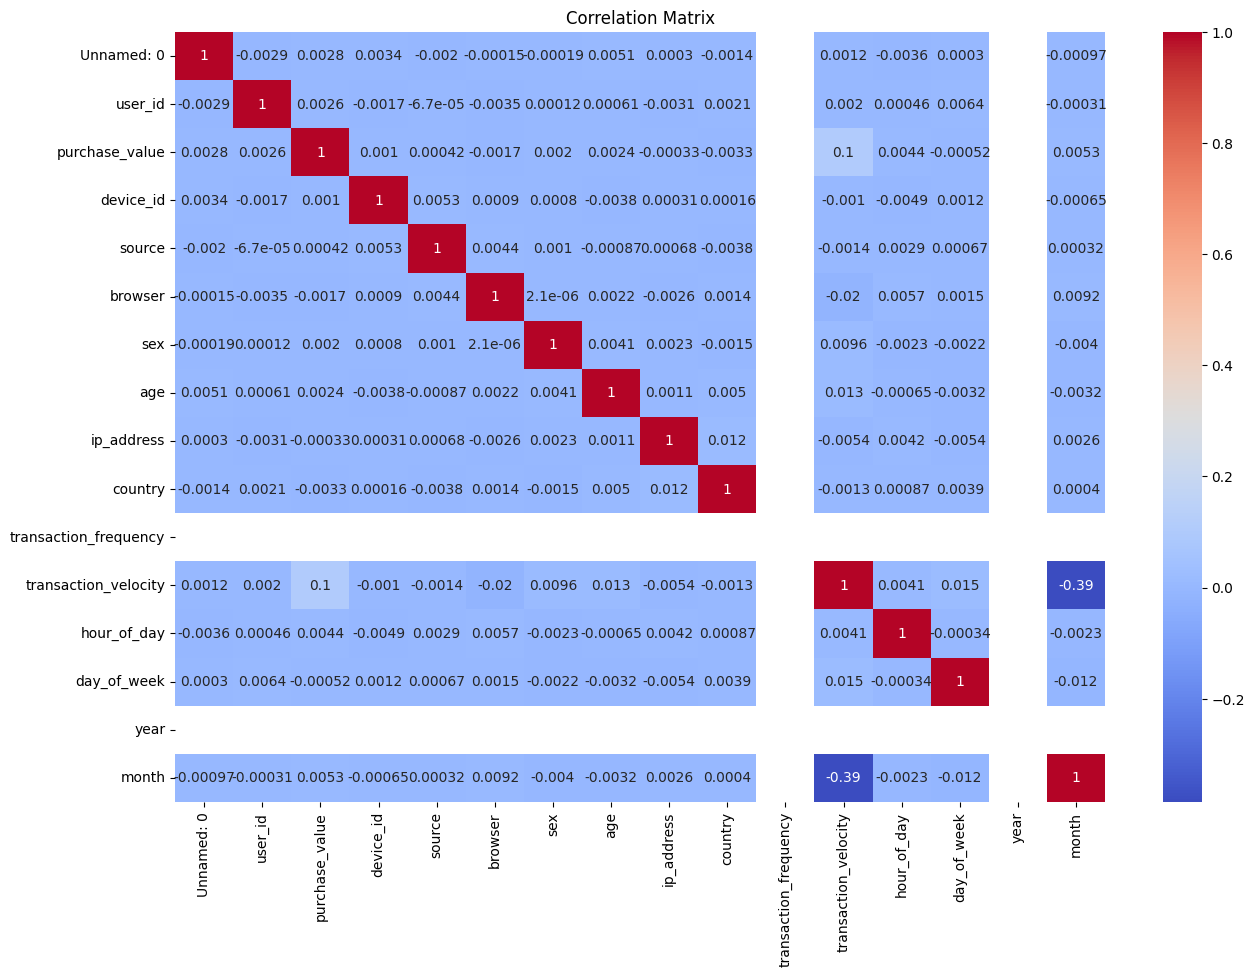

In [4]:
def correlation_analysis(data):
    # Select only numeric columns
    numeric_data = data.select_dtypes(include=np.number)
    
    # Compute correlation matrix
    correlation_matrix = numeric_data.corr()
    
    # Plot heatmap
    plt.figure(figsize=(15, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()

# Perform correlation analysis
correlation_analysis(cleaned_fraud_data)

In [5]:
# Separate features and target variable
X = cleaned_fraud_data.drop('class', axis=1)
y = cleaned_fraud_data['class']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

KeyError: "['class'] not found in axis"

In [ ]:
# Start MLflow experiment
mlflow.set_experiment("Fraud Detection")

In [ ]:
# Decision Tree model training
with mlflow.start_run(run_name="Decision Tree"):
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)

    # SHAP explanations
    explainer = shap.Explainer(model)
    shap_values = explainer.shap_values(X_test)

    # LIME explanations
    explainer_lime = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=['0', '1'])

    # LIME feature importance plot for a specific prediction
    observation = X_test.iloc[0]  
    explanation = explainer_lime.explain_instance(observation.values, model.predict_proba, num_features=len(X_train.columns))
    explanation.show_in_notebook(show_predicted_value=True)

    # SHAP summary plot
    shap.summary_plot(shap_values, X_test)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)

    # Log parameters and metrics
    mlflow.log_params(model.get_params())
    mlflow.log_metric("accuracy", accuracy)

    # Log the trained model
    mlflow.sklearn.log_model(model, "DecisionTreeModel")

    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)